<a href="https://colab.research.google.com/github/uni-assignments/Word2Vec/blob/main/C%C3%B3pia_de_Word2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk, itertools, requests, zipfile

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from sklearn.manifold import TSNE


nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Download e descompactação do corpus disponibilizado pelo Professor: [text8](http://mattmahoney.net/dc/text8.zip)

O download do link foi realizado pela biblioteca **requests**, para a descompactação do arquivo zip foi utilizada a biblioteca **zipfile**. Por fim o conteudo do arquivo é lido e armazenado em uma variável *corpus* como uma cadeia de caractéres.

In [ ]:
fname = 'text8.zip'
url = 'http://mattmahoney.net/dc/' + fname
r = requests.get(url)
open(fname , 'wb').write(r.content)

with zipfile.ZipFile(fname, 'r') as zip_ref:
    zip_ref.extractall("")

with open('text8', 'r') as file:
    corpus = file.read().replace('\n', '')

print(corpus[:200])

 anarchism originated as a term of abuse first used against early working class radicals including the diggers of the english revolution and the sans culottes of the french revolution whilst the term 


## Pré-Processamento de Dados
Nesta etapa, todo o texto transformado numa lista de palavras e colocado em caixa baixa. Além disso, pontuações, números, caractéres especiais e stopwords foram removidas.

#### Texto convertido para caixa baixa:

In [ ]:
corpus = corpus.lower()
print(corpus[:200])

 anarchism originated as a term of abuse first used against early working class radicals including the diggers of the english revolution and the sans culottes of the french revolution whilst the term 


#### Texto transformado em uma lista de palavras utilizando a biblioteca **NLTK**

In [ ]:
word_tokens = word_tokenize(corpus)
print(word_tokens[:200])

['anarchism', 'originated', 'as', 'a', 'term', 'of', 'abuse', 'first', 'used', 'against', 'early', 'working', 'class', 'radicals', 'including', 'the', 'diggers', 'of', 'the', 'english', 'revolution', 'and', 'the', 'sans', 'culottes', 'of', 'the', 'french', 'revolution', 'whilst', 'the', 'term', 'is', 'still', 'used', 'in', 'a', 'pejorative', 'way', 'to', 'describe', 'any', 'act', 'that', 'used', 'violent', 'means', 'to', 'destroy', 'the', 'organization', 'of', 'society', 'it', 'has', 'also', 'been', 'taken', 'up', 'as', 'a', 'positive', 'label', 'by', 'self', 'defined', 'anarchists', 'the', 'word', 'anarchism', 'is', 'derived', 'from', 'the', 'greek', 'without', 'archons', 'ruler', 'chief', 'king', 'anarchism', 'as', 'a', 'political', 'philosophy', 'is', 'the', 'belief', 'that', 'rulers', 'are', 'unnecessary', 'and', 'should', 'be', 'abolished', 'although', 'there', 'are', 'differing', 'interpretations', 'of', 'what', 'this', 'means', 'anarchism', 'also', 'refers', 'to', 'related', 'so

#### Stopwords, obtidas pelo pacote **NLTK**, retiradas do texto.

In [ ]:
stop_words = set(stopwords.words('english'))
filtered_words = [[w for w in word_tokens if not w in stop_words]]
print(filtered_words[0][0:200])

['anarchism', 'originated', 'term', 'abuse', 'first', 'used', 'early', 'working', 'class', 'radicals', 'including', 'diggers', 'english', 'revolution', 'sans', 'culottes', 'french', 'revolution', 'whilst', 'term', 'still', 'used', 'pejorative', 'way', 'describe', 'act', 'used', 'violent', 'means', 'destroy', 'organization', 'society', 'also', 'taken', 'positive', 'label', 'self', 'defined', 'anarchists', 'word', 'anarchism', 'derived', 'greek', 'without', 'archons', 'ruler', 'chief', 'king', 'anarchism', 'political', 'philosophy', 'belief', 'rulers', 'unnecessary', 'abolished', 'although', 'differing', 'interpretations', 'means', 'anarchism', 'also', 'refers', 'related', 'social', 'movements', 'advocate', 'elimination', 'authoritarian', 'institutions', 'particularly', 'state', 'word', 'anarchy', 'anarchists', 'use', 'imply', 'chaos', 'nihilism', 'anomie', 'rather', 'harmonious', 'anti', 'authoritarian', 'society', 'place', 'regarded', 'authoritarian', 'political', 'structures', 'coerci

## Treinamento dos Modelos
Em seguida por intermédio da biblioteca gensim os modelos *Continuous Bag of Words* e *Skip-Gram* foram treinados. Como hiperparâmetros dos modelos é interessante destacar os seguintes atributos:
#### Parâmetros fixos

*   Epochs = 10
*   Min Count = 1
*   Report Delay = 1
*   Alpha = 0.01

#### Parâmetros que foram variados
*   Size: define a dimensão dos embeddings
*   Window: define o tamanho do contexto a ser analizado, ou seja a distância máxima entre a palavra atual e a palavra predita.
*   Total-examples:  
*   sg: O algoritmo de treinamento, pode ser tanto o *Continuous Bag of Words*, codificado como 0, ou o *Skip-Gram*, codificado como 1.



In [ ]:
skip_gram = Word2Vec(sentences=filtered_words, min_count=1,size= 500,workers=3, window =7, sg = 1)


In [ ]:
skip_gram.train(filtered_words, total_examples=100, epochs=12, report_delay=1)

(120000, 130660332)

In [ ]:
skip_gram.wv.most_similar('anarchism')

[('anarchists', 0.9839906692504883),
 ('anarchist', 0.982738733291626),
 ('see', 0.9772050976753235),
 ('revolution', 0.9725072383880615),
 ('spanish', 0.9709188938140869),
 ('civil', 0.9698560237884521),
 ('post', 0.9689147472381592),
 ('anarcho', 0.9685035347938538),
 ('spain', 0.9678282737731934),
 ('major', 0.9675655961036682)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py

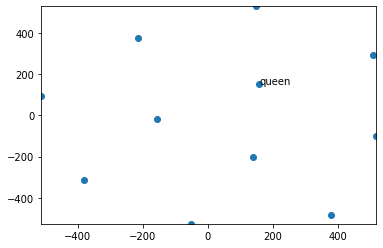

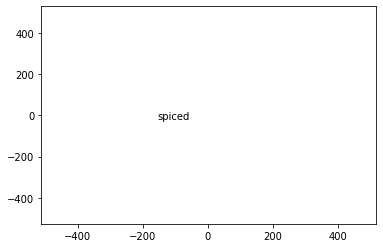

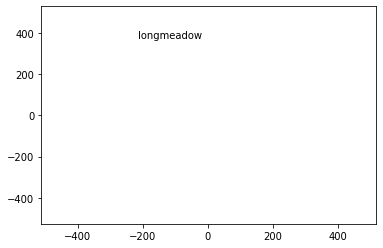

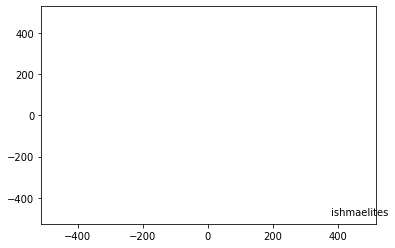

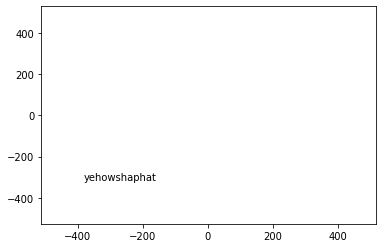

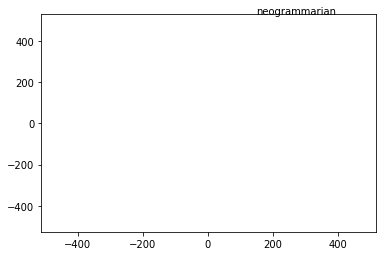

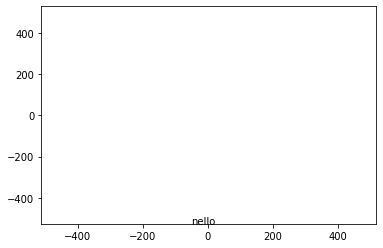

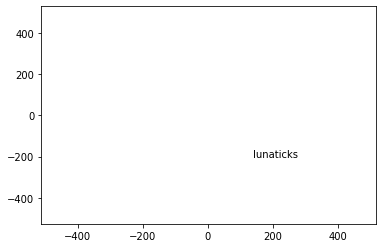

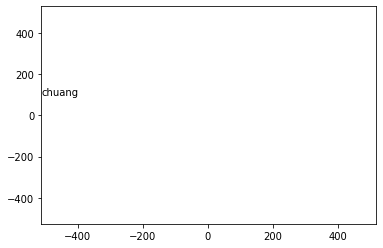

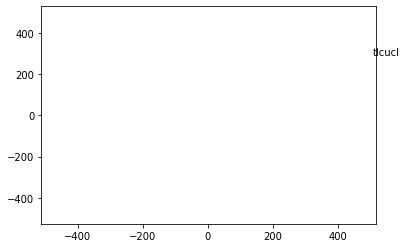

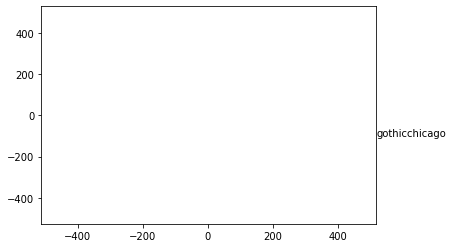

In [ ]:
def display_closestwords_tsnescatterplot(model, word, size): 
  arr = np.empty((0,size), dtype='f')
  word_labels = [word]

  close_words = model.similar_by_word(word)
  arr = np.append(arr, np.array([model[word]]), axis=0)
  for wrd_score in close_words:
    wrd_vector = model[wrd_score[0]]
    word_labels.append(wrd_score[0])
    arr = np.append(arr, np.array([wrd_vector]), axis=0)
          
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

  x_coords = Y[:, 0]
  y_coords = Y[:, 1]
  plt.scatter(x_coords, y_coords)

  for label, x, y in zip(word_labels, x_coords, y_coords):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

display_closestwords_tsnescatterplot(skip_gram, 'queen', 50) 